In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [2]:
df = pd.read_csv('bus_table.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


### Мини-блок, чтобы понимать, что происходит (опционально) для себя 

In [3]:
df.shape
display(df.head(3))
display(df.tail(3))

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46


,data,route,direction,scheduled,actual
39154,2016-05-27,B,north,15:14:29,15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40
39156,2016-05-27,B,north,18:06:29,18:07:01


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

### Визуальное представление пропущенных данных (опционально)

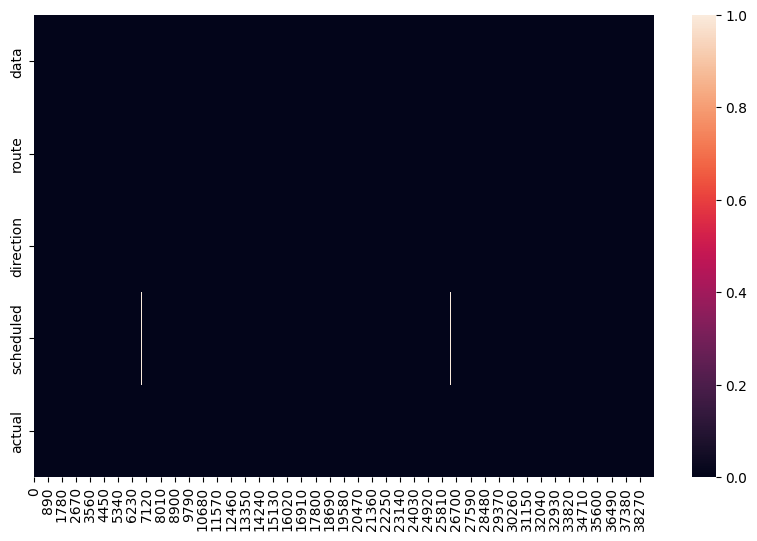

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose());

In [5]:
# Мини доп статистика по пропущенным данным (да, мы могли это посмотреть в info и describe, но тут аккуратная табличка)
display(df.isna().sum())

data           0
route          0
direction      0
scheduled    240
actual         0
dtype: int64

### Основное задание пункта 

In [6]:
df_null = df[df.isna().any(axis=1)] # наш df с пропущенными значениями 
display(df_null.shape, df_null.size) # Размерности из мини-таблички выше и df_null совпадают 
display(df_null.head()) # Опционально

(240, 5)

1200

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,NaN,16:00:57
471,2016-03-31,A,south,NaN,15:28:05
588,2016-03-30,A,south,NaN,14:52:36
599,2016-03-30,A,south,NaN,15:12:06
685,2016-03-29,A,south,NaN,17:56:29


In [7]:
# Чистим наш основной df 
df = df.dropna()
df.shape # все размерности совпадают, супер, вроде ничего не потеряли 

(38917, 5)

## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


### ПУНКТ 3.1 

In [8]:
df.loc[:, 'table'] = df['data'] + ' ' + df['scheduled']
df['table'] = pd.to_datetime(df['table'])
df.head()
# df.dtypes # опционально (проверить тип данных)

,data,route,direction,scheduled,actual,table
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57


### ПУНКТ 3.2

In [9]:
df.loc[:, 'arrival'] = df['data'] + ' ' + df['actual']
df['arrival'] = pd.to_datetime(df['arrival'])
df.head()
# df.dtypes # опционально (проверить тип данных)

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39


## Чиним наши данные (Да... мы вернулись...) 

## ДИСКЛЕЙМЕР! Дальше пойдет часть кода, которую стоит запускать ТОЛЬКО 1 раз, тк при запуска этих блоков происходит добавление дней и при многократном запуске данные многие могут быть искажены, ошибку с 'A value is trying to be set on a copy of a slice from a DataFrame.' я пытался исправить, но у меня не получилось

### Пограничный случай: автобус опаздывает на стыке суток 

In [10]:
fix_time = (df['table'].apply(lambda x: x.hour == 23) & df['arrival'].apply(lambda x: x.hour == 0)) # маска, которая помогает рассмотреть наши граничные случаи 
# Фильтрация данных по условию fix_time
df_filtered = df[fix_time]
# Применение функции к отобранным данным
df_filtered['arrival'] = df_filtered['arrival'].apply(lambda x: x + timedelta(days=1))
# Обновляем исходный df
df.loc[fix_time, 'arrival'] = df_filtered['arrival']
display(df[fix_time].head(10)) # проверка

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/2328706428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['arrival'] = df_filtered['arrival'].apply(lambda x: x + timedelta(days=1))


,data,route,direction,scheduled,actual,table,arrival
239,2016-03-26,B,south,23:59:58,00:02:35,2016-03-26 23:59:58,2016-03-27 00:02:35
1846,2016-03-28,B,south,23:59:58,00:03:56,2016-03-28 23:59:58,2016-03-29 00:03:56
1888,2016-03-29,B,south,23:59:58,00:06:32,2016-03-29 23:59:58,2016-03-30 00:06:32
2050,2016-03-30,B,south,23:59:58,00:00:15,2016-03-30 23:59:58,2016-03-31 00:00:15
2178,2016-03-31,B,south,23:59:58,00:04:18,2016-03-31 23:59:58,2016-04-01 00:04:18
2278,2016-04-01,B,south,23:59:58,00:03:02,2016-04-01 23:59:58,2016-04-02 00:03:02
2415,2016-04-02,B,south,23:59:58,00:02:49,2016-04-02 23:59:58,2016-04-03 00:02:49
3302,2016-04-08,C,south,23:53:59,00:04:25,2016-04-08 23:53:59,2016-04-09 00:04:25
3931,2016-04-03,B,south,23:59:58,00:03:03,2016-04-03 23:59:58,2016-04-04 00:03:03
3992,2016-04-04,B,south,23:59:58,00:00:22,2016-04-04 23:59:58,2016-04-05 00:00:22


### Пограничный случай: автобус приезжает раньше на стыке суток 

In [11]:
fix_time = (df['table'].apply(lambda x: x.hour == 0) & df['arrival'].apply(lambda x: x.hour == 23)) # маска, которая помогает рассмотреть наши граничные случаи 
# Фильтрация данных по условию fix_time
df_filtered = df[fix_time]
# Применение функции к отобранным данным
df_filtered['table'] = df_filtered['table'].apply(lambda x: x + timedelta(days=1))
# Обновляем исходный df
df.loc[fix_time, 'table'] = df_filtered['table']
display(df[fix_time].head(10)) # проверка

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/3430358509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['table'] = df_filtered['table'].apply(lambda x: x + timedelta(days=1))


,data,route,direction,scheduled,actual,table,arrival
2844,2016-04-06,A,south,00:04:57,23:59:52,2016-04-07 00:04:57,2016-04-06 23:59:52
7139,2016-05-04,A,south,00:04:57,23:59:55,2016-05-05 00:04:57,2016-05-04 23:59:55
7208,2016-05-03,A,south,00:04:57,23:59:54,2016-05-04 00:04:57,2016-05-03 23:59:54
19904,2016-04-01,A,north,00:00:25,23:58:15,2016-04-02 00:00:25,2016-04-01 23:58:15
20395,2016-03-27,A,north,00:00:25,23:59:48,2016-03-28 00:00:25,2016-03-27 23:59:48
22057,2016-04-08,A,north,00:00:25,23:58:11,2016-04-09 00:00:25,2016-04-08 23:58:11
22363,2016-04-05,A,north,00:00:25,23:59:38,2016-04-06 00:00:25,2016-04-05 23:59:38
24227,2016-05-26,A,north,00:00:25,23:59:32,2016-05-27 00:00:25,2016-05-26 23:59:32
24385,2016-05-25,A,north,00:00:25,23:59:36,2016-05-26 00:00:25,2016-05-25 23:59:36
24467,2016-05-24,A,north,00:00:25,23:56:52,2016-05-25 00:00:25,2016-05-24 23:56:52


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

,route,direction,table,arrival,inteval,arr_inteval,delay
19512,A,north,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.600000
19471,A,north,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000,-0.100000
19487,A,north,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333,4.833333
19511,A,north,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667,8.750000
19504,A,north,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000,-0.650000
19550,A,north,2016-03-26 05:45:28,2016-03-26 05:46:17,20.00,21.466667,0.816667
19530,A,north,2016-03-26 06:00:28,2016-03-26 05:59:21,15.00,13.066667,-1.116667
19510,A,north,2016-03-26 06:15:28,2016-03-26 06:16:59,15.00,17.633333,1.516667
19486,A,north,2016-03-26 06:30:28,2016-03-26 06:26:04,15.00,9.083333,-4.400000
19497,A,north,2016-03-26 06:45:28,2016-03-26 06:46:12,15.00,20.133333,0.733333


count    38917.000000
mean         1.480887
std          4.945535
min        -12.866667
25%         -0.983333
50%          0.516667
75%          2.716667
max        150.283333
Name: delay, dtype: float64

'Процент ранних приходов:'

41.34439961970347

'%'

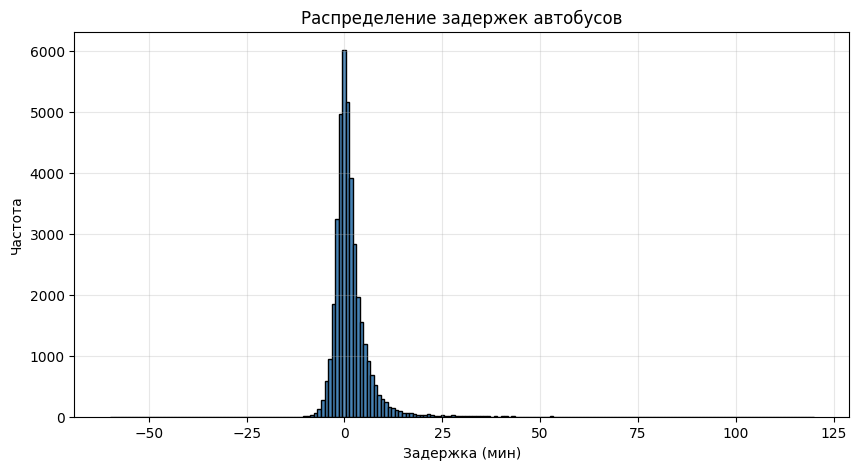

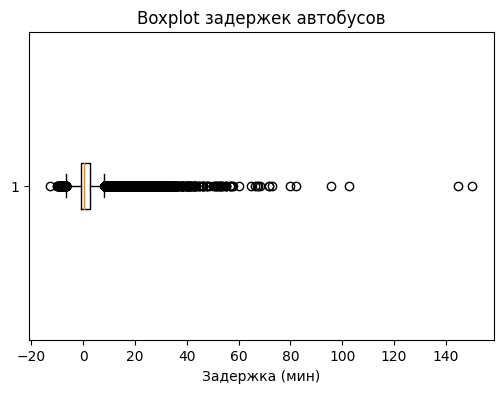

In [15]:
df = df.sort_values(['route', 'direction', 'table'])
df['inteval'] = (
    df
      .groupby(['route', 'direction'])['table']
      .diff()                
      .dt.total_seconds()    
    / 60                     
)

# Считаем промежутки между фактическими прибытием
df = df.sort_values(['route', 'direction', 'arrival'])
df['arr_inteval'] = (
    df
      .groupby(['route', 'direction'])['arrival']
      .diff()
      .dt.total_seconds()   
    / 60                    
)

# Задержка 
df['delay'] = (
    df['arrival'].view('int64')   
  - df['table'].view('int64')
) / 1e9 / 60                     

# 5. Краткая проверка
display(df[['route','direction','table','arrival','inteval','arr_inteval','delay']]
      .head(10))
display(df['delay'].describe())
display('Процент ранних приходов:', (df['delay'] < 0).mean() * 100, '%')


plt.figure(figsize=(10, 5))
plt.hist(df['delay'].dropna(), bins=200, range=[-60, 120], color='steelblue', edgecolor='black')
plt.title('Распределение задержек автобусов')
plt.xlabel('Задержка (мин)')
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(6, 4))
plt.boxplot(df['delay'].dropna(), vert=False, showfliers=True)
plt.title('Boxplot задержек автобусов')
plt.xlabel('Задержка (мин)')
plt.show()

## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [16]:
df['difference'] = (df['table'] - df['arrival']).astype('timedelta64[s]')
df['difference'] = df['difference'].apply(lambda x: x.total_seconds() // 60)
display(df.tail())

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval,delay,difference
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0,15.550000,4.633333,-5.0
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0,9.766667,-0.600000,0.0
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0,16.916667,1.316667,-2.0
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0,24.333333,5.650000,-6.0
9735,2016-05-27,C,south,23:53:59,23:57:15,2016-05-27 23:53:59,2016-05-27 23:57:15,30.0,27.616667,3.266667,-4.0


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

## ПУНКТ 6

### ПУНКТ 6.1.1. (Общая визулизация) 

/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


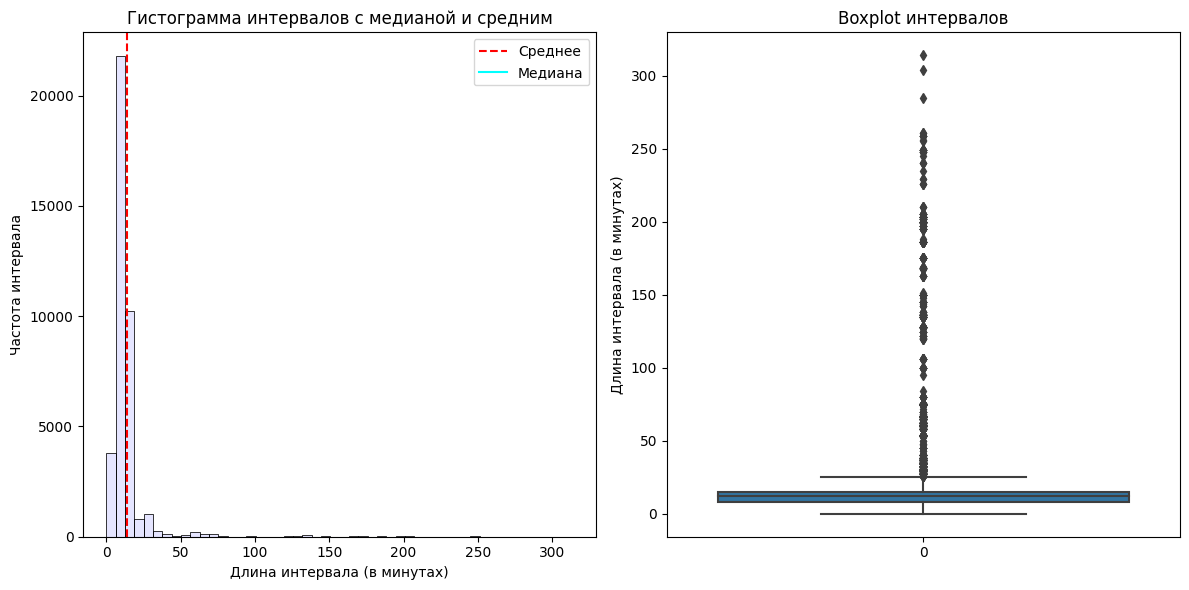

In [18]:
intervals = df['inteval']

# Создаем фигуру и оси для двух графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График 1: Гистограмма с медианой и средним
sns.histplot(intervals, bins=50, ax=axs[0], alpha=0.1, color='b')
axs[0].axvline(np.mean(intervals), color='r', linestyle='--', label='Среднее')
axs[0].axvline(np.median(intervals), color='aqua', linestyle='-', label='Медиана')
axs[0].legend()
axs[0].set_title('Гистограмма интервалов с медианой и средним')
axs[0].set_xlabel('Длина интервала (в минутах)')
axs[0].set_ylabel('Частота интервала')  

# График 2: Boxplot
sns.boxplot(intervals, ax=axs[1])
axs[1].set_title('Boxplot интервалов')
axs[1].set_ylabel('Длина интервала (в минутах)') 
plt.tight_layout()
plt.show()


### ПУНКТ 6.1.2. (Визулизация по направлениям) 

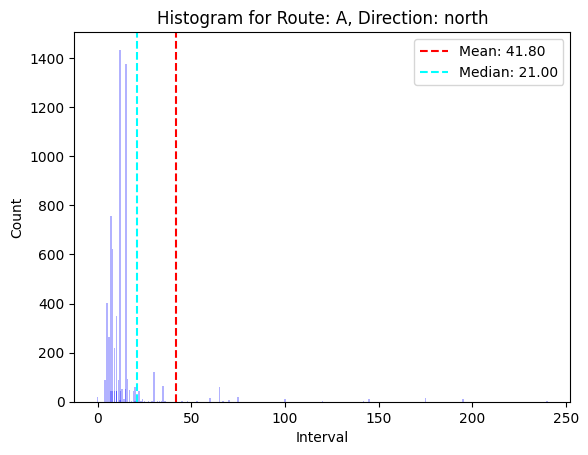

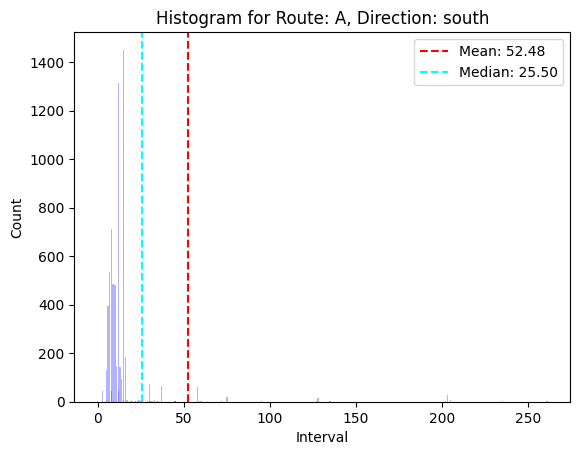

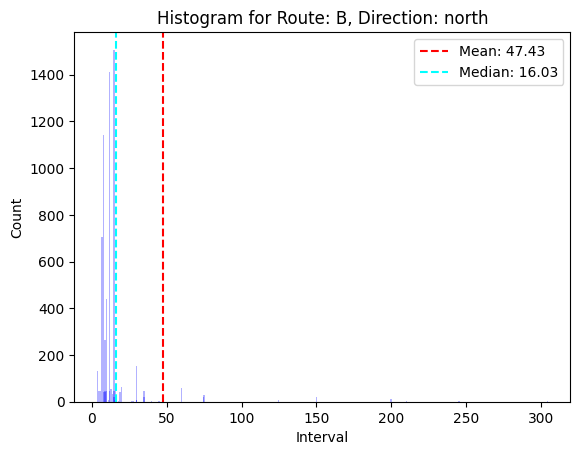

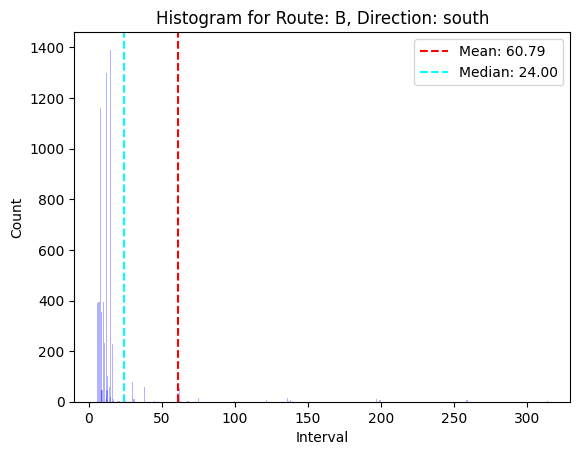

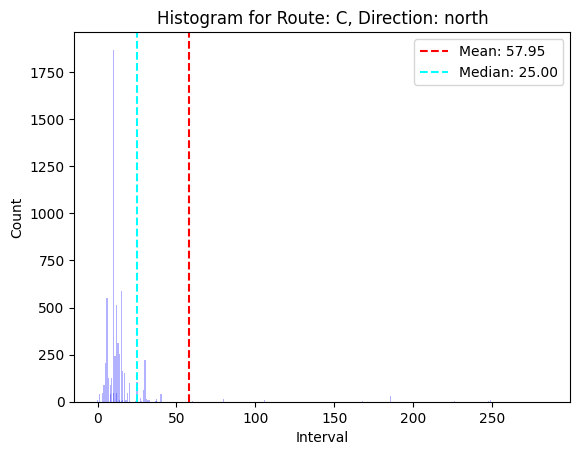

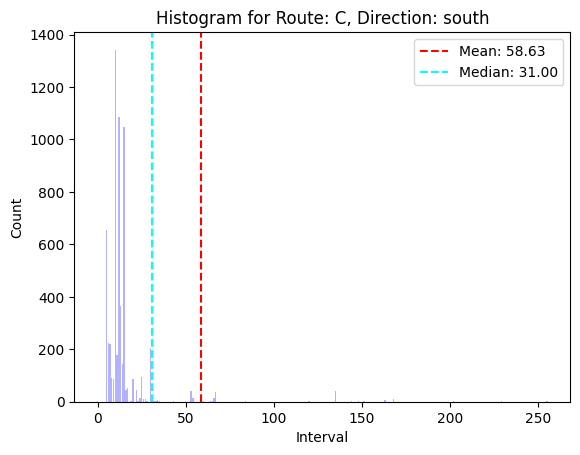

In [19]:
# Группировка данных по уникальным комбинациям 'route' и 'direction' и подсчет частоты значений 'interval'
grouped = df.groupby(['route', 'direction', 'inteval']).size().reset_index(name='count')

# Построение гистограмм для каждого маршрута с добавлением среднего и медианы
for name, group in grouped.groupby(['route', 'direction']):
    route, direction = name
    
    # Вычисление среднего и медианы для текущего маршрута
    mean_interval = group['inteval'].mean()
    median_interval = group['inteval'].median()
    
    # Создание гистограммы для текущего маршрута с средним и медианой
    plt.figure()
    plt.bar(group['inteval'], group['count'], alpha=0.3, color='b')
    plt.axvline(mean_interval, color='r', linestyle='--', label=f'Mean: {mean_interval:.2f}')
    plt.axvline(median_interval, color='aqua', linestyle='--', label=f'Median: {median_interval:.2f}')
    plt.xlabel('Interval')
    plt.ylabel('Count')
    plt.title(f'Histogram for Route: {route}, Direction: {direction}')
    plt.legend()
    plt.show()

### ПУНКТ 6.2.1. (Общая визулизация для опозданий) 

/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


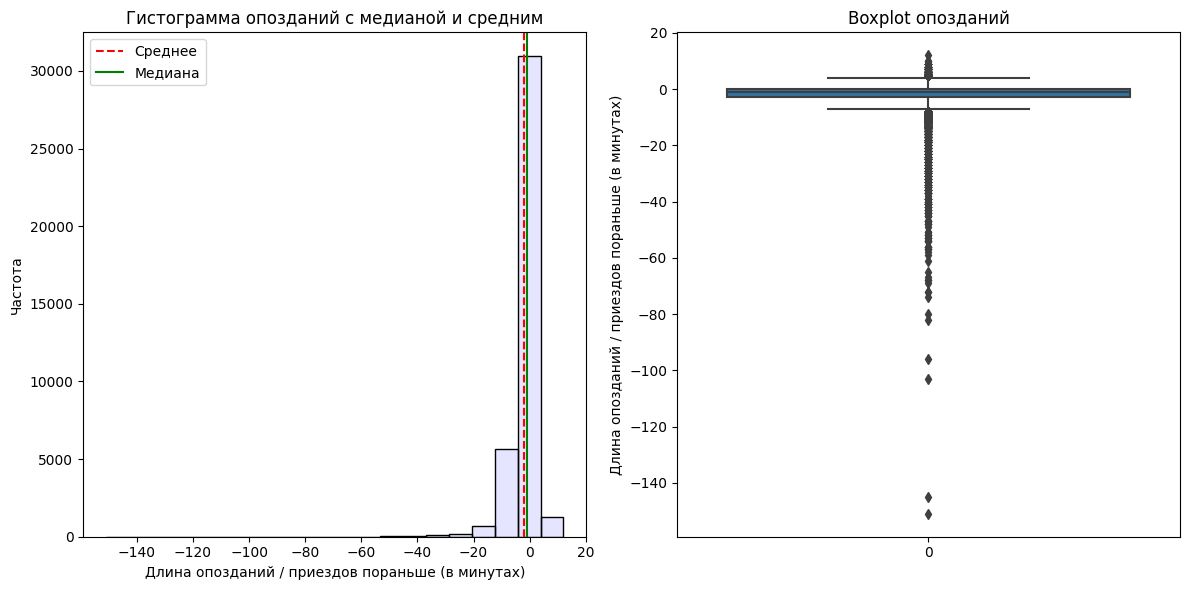

In [20]:
dif = df['difference']

# Создаем фигуру и оси для двух графиков
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График 1: Гистограмма с медианой и средним
sns.histplot(dif, bins=20, ax=axs[0], alpha=0.1, color='b')
axs[0].axvline(np.mean(dif), color='r', linestyle='--', label='Среднее')
axs[0].axvline(np.median(dif), color='g', linestyle='-', label='Медиана')
axs[0].legend()
axs[0].set_title('Гистограмма опозданий с медианой и средним')
axs[0].set_xlabel('Длина опозданий / приездов пораньше (в минутах)')  
axs[0].set_ylabel('Частота')  


# График 2: Boxplot
sns.boxplot(dif, ax=axs[1])
axs[1].set_title('Boxplot опозданий')
axs[1].set_ylabel('Длина опозданий / приездов пораньше (в минутах)')
plt.tight_layout()
plt.show()


### ПУНКТ 6.2.2. (Визулизация для опозданий по группам) 

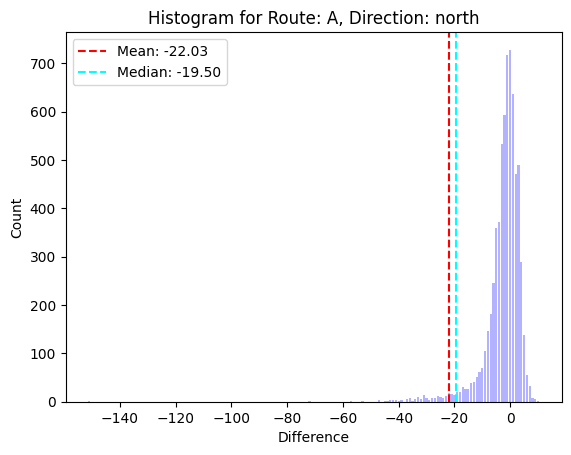

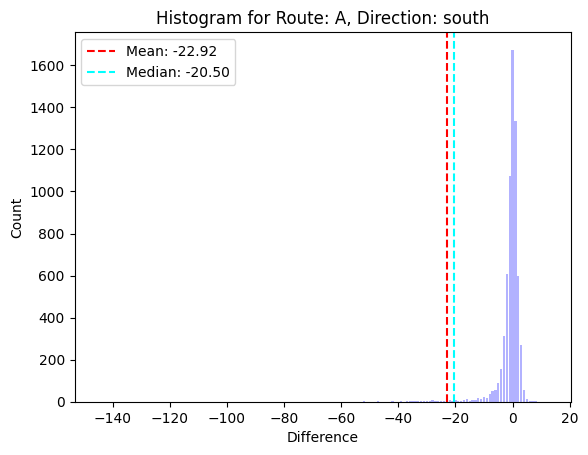

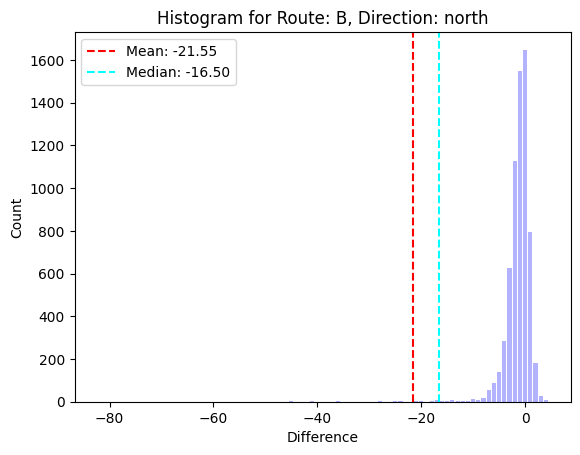

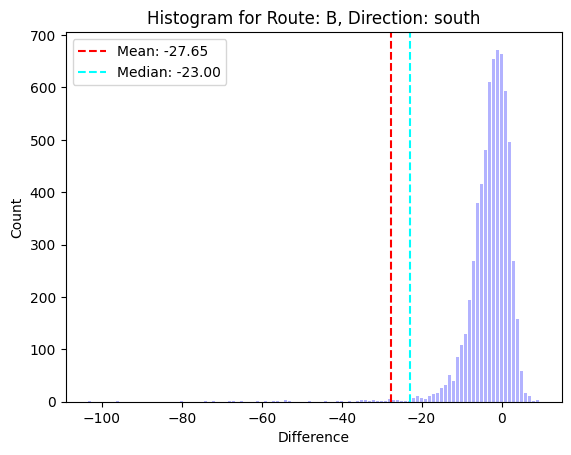

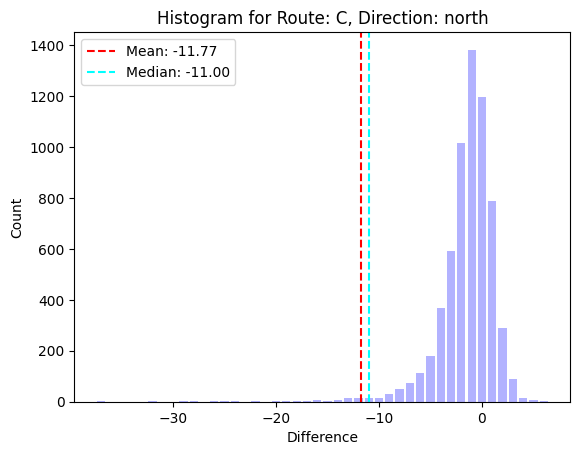

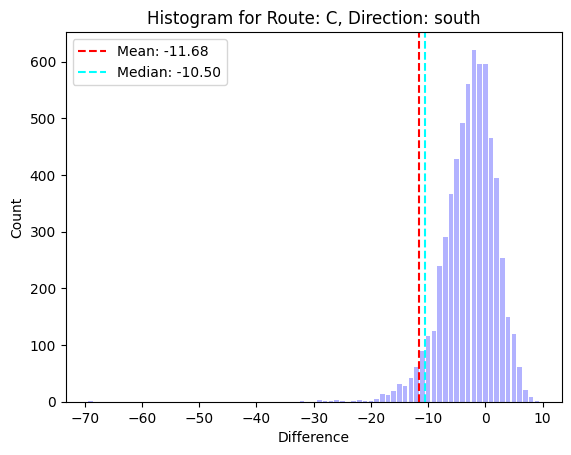

In [21]:
# Группировка данных по уникальным комбинациям 'route' и 'direction' и подсчет частоты значений 'difference'
grouped = df.groupby(['route', 'direction', 'difference']).size().reset_index(name='count')

# Построение гистограмм для каждого маршрута с добавлением среднего и медианы
for name, group in grouped.groupby(['route', 'direction']):
    route, direction = name
    
    # Вычисление среднего и медианы для текущего маршрута
    mean_diff = group['difference'].mean()
    median_diff = group['difference'].median()
    
    # Создание гистограммы для текущего маршрута с средним и медианой
    plt.figure()
    plt.bar(group['difference'], group['count'], alpha=0.3, color='b')
    plt.axvline(mean_diff, color='r', linestyle='--', label=f'Mean: {mean_diff:.2f}')
    plt.axvline(median_diff, color='aqua', linestyle='--', label=f'Median: {median_diff:.2f}')
    plt.xlabel('Difference')
    plt.ylabel('Count')
    plt.title(f'Histogram for Route: {route}, Direction: {direction}')
    plt.legend()
    plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

*напиши тут*

## Содержательная информация об автобусах

Анализируя данные о задержках автобусов, можно сделать ряд выводов и предположений:

1. Большинство автобусов приезжают с небольшим опозданием (от 0 до 20 минут). Это может говорить о том, что расписание движения составлено с учетом возможных задержек, и водители стараются придерживаться графика. Однако, вероятно, существуют факторы, которые периодически приводят к опозданиям в этом диапазоне (например, пробки, высадка/посадка пассажиров).

2. Случаи, когда автобусы приезжают раньше расписания, скорее всего, связаны с недооценкой времени в пути. Возможно, на некоторых участках маршрута движение происходит быстрее, чем предполагалось. Однако водители стараются не приезжать слишком рано, чтобы не нарушать график.

3. В среднем автобусы практически не опаздывают или опаздывают незначительно (1-2 минуты). Это говорит о высокой эффективности работы системы общественного транспорта и хорошей организации движения. 

4. Небольшие задержки в 1-2 минуты могут быть связаны с непредвиденными обстоятельствами, такими как непогода, ДТП или другие внештатные ситуации на дороге. Однако их влияние на общую пунктуальность движения незначительно.

В целом, данные свидетельствуют о хорошо налаженной системе городского пассажирского транспорта, где расписание движения составлено с учетом реальных условий, а водители стараются придерживаться графика. Незначительные отклонения в сторону опоздания или раннего прибытия являются нормой и не создают серьезных неудобств для пассажиров. Это говорит о высоком уровне организации перевозок.

## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

### Способ 1 (халтурный - заполняем пропуски фактическим прибытием) 

In [22]:
# Пояснительная бригада: мы наши пропущенные значения берем просто из столбика actual, по факту таким образом,
# У нас фактическое совпадает с табличным расписанием 

df_test = pd.read_csv('/Users/dmitry/ВАД/ДЗшки/ДЗ 3 /bus_table.csv')

# Преобразуем столбцы 'scheduled' и 'actual' в формат datetime
df_test['scheduled'] = pd.to_datetime(df_test['scheduled'])
df_test['actual'] = pd.to_datetime(df_test['actual'])

# Заполняем пропущенные значения в 'scheduled' с использованием данных из 'actual'
df_test['scheduled'] = df_test['scheduled'].fillna(df_test['actual'])

# Выводим обновленный DataFrame с заполненными значениями в 'scheduled'
display(df_test)

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/1811024469.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['scheduled'] = pd.to_datetime(df_test['scheduled'])
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/1811024469.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['actual'] = pd.to_datetime(df_test['actual'])


,data,route,direction,scheduled,actual
0,2016-03-26,A,south,2025-06-22 01:11:57,2025-06-22 01:13:19
1,2016-03-26,A,south,2025-06-22 23:19:57,2025-06-22 23:16:13
2,2016-03-26,A,south,2025-06-22 21:19:57,2025-06-22 21:18:46
3,2016-03-26,A,south,2025-06-22 19:04:57,2025-06-22 19:01:49
4,2016-03-26,A,south,2025-06-22 16:42:57,2025-06-22 16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,2025-06-22 10:50:25,2025-06-22 10:49:50
39153,2016-05-27,B,north,2025-06-22 13:02:27,2025-06-22 13:07:10
39154,2016-05-27,B,north,2025-06-22 15:14:29,2025-06-22 15:15:55
39155,2016-05-27,B,north,2025-06-22 17:26:29,2025-06-22 17:25:40


In [23]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       39157 non-null  object        
 1   route      39157 non-null  object        
 2   direction  39157 non-null  object        
 3   scheduled  39157 non-null  datetime64[ns]
 4   actual     39157 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 1.8+ MB


,scheduled,actual
count,39157,39157
mean,2025-06-22 13:42:14.053323776,2025-06-22 13:42:25.134382080
min,2025-06-22 00:00:25,2025-06-22 00:00:13
25%,2025-06-22 09:06:59,2025-06-22 09:08:29
50%,2025-06-22 14:04:56,2025-06-22 14:04:27
75%,2025-06-22 17:58:54,2025-06-22 18:00:01
max,2025-06-22 23:59:58,2025-06-22 23:59:57


### Способ 2 (Заполнение средней и медианой) 

In [24]:
# Пояснительная бригада тк нам из данных выше уже известна разница для многих данных df['difference'] 
# (разница между фактическим и табличным), то мы берем эти данные, смотрим среднюю и медиану, а потом 
# из фактического вычитаем это время, те логика такая, зная примерно на сколько в среднем/медиана разницы 
# между фактическим временем и табличным, мы эту разницы вычитаем показываю приблизительное время прибытия 
# по расписанию

df_test_1 = pd.read_csv('/Users/dmitry/ВАД/ДЗшки/ДЗ 3 /bus_table.csv')

# Тк в заданиях выше я считал разницу между табличным расписанием и фактическим, то я возьму оттуда среднюю и медиану по этой разнице, а затем по этим данным я ±
# могу посмотреть тренды (в нашем случае автобус опаздываем на 1-2 минуты) и с помощью этих трендов восстановить данные 

df_test_1_mean = df['difference'].mean()
df_test_1_median = df['difference'].median()

# Переводим в другой тип данных
df_test_1['actual'] = pd.to_datetime(df_test_1['actual']) # Практически 2 минуты (1.58)
df_test_1['scheduled'] = pd.to_datetime(df_test_1['scheduled']) # 1 минута ровно 

# Для интереса сделаю копию df и разнесу их, чтобы заполнить df разными способами 
df_mean = df_test_1.copy()
df_median = df_test_1.copy()

# Немного колдуем с данными 
two_minutes = timedelta(minutes=2) # наше среднее (не хочу усложнять жизнь)
one_minute = timedelta(minutes=1) # наша медиана (не хочу усложнять жизнь)

# Заполняем df_mean
def fill_scheduled(df_mean, two_minutes):
    for index, row in df_mean.iterrows():
        if pd.isnull(row['scheduled']):
            df_mean.at[index, 'scheduled'] = row['actual'] - two_minutes
    return df_mean
df_mean = fill_scheduled(df_mean, timedelta(minutes=2))

# Заполняем df_median 
def filll_scheduled(df_median, two_minutes):
    for index, row in df_median.iterrows():
        if pd.isnull(row['scheduled']):
            df_median.at[index, 'scheduled'] = row['actual'] - two_minutes
    return df_median
df_median = filll_scheduled(df_median, timedelta(minutes=2))

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/3835050336.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test_1['actual'] = pd.to_datetime(df_test_1['actual']) # Практически 2 минуты (1.58)
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/3835050336.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test_1['scheduled'] = pd.to_datetime(df_test_1['scheduled']) # 1 минута ровно


In [25]:
df_mean.info()
df_mean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       39157 non-null  object        
 1   route      39157 non-null  object        
 2   direction  39157 non-null  object        
 3   scheduled  39157 non-null  datetime64[ns]
 4   actual     39157 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 2.8+ MB


,scheduled,actual
count,39157,39157
mean,2025-06-22 13:42:13.317822976,2025-06-22 13:42:25.134382080
min,2025-06-22 00:00:25,2025-06-22 00:00:13
25%,2025-06-22 09:06:59,2025-06-22 09:08:29
50%,2025-06-22 14:04:56,2025-06-22 14:04:27
75%,2025-06-22 17:58:12,2025-06-22 18:00:01
max,2025-06-22 23:59:58,2025-06-22 23:59:57


In [26]:
df_median.info()
df_median.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       39157 non-null  object        
 1   route      39157 non-null  object        
 2   direction  39157 non-null  object        
 3   scheduled  39157 non-null  datetime64[ns]
 4   actual     39157 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 2.8+ MB


,scheduled,actual
count,39157,39157
mean,2025-06-22 13:42:13.317822976,2025-06-22 13:42:25.134382080
min,2025-06-22 00:00:25,2025-06-22 00:00:13
25%,2025-06-22 09:06:59,2025-06-22 09:08:29
50%,2025-06-22 14:04:56,2025-06-22 14:04:27
75%,2025-06-22 17:58:12,2025-06-22 18:00:01
max,2025-06-22 23:59:58,2025-06-22 23:59:57


### Cпособ 3: Интрополяция (он у меня не заработал(, но я пытался), я не очень понимаю, что я делаю не так

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/1312836947.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['scheduled'] = pd.to_datetime(df_test['scheduled'])  # Преобразуем столбец в datetime, если это необходимо


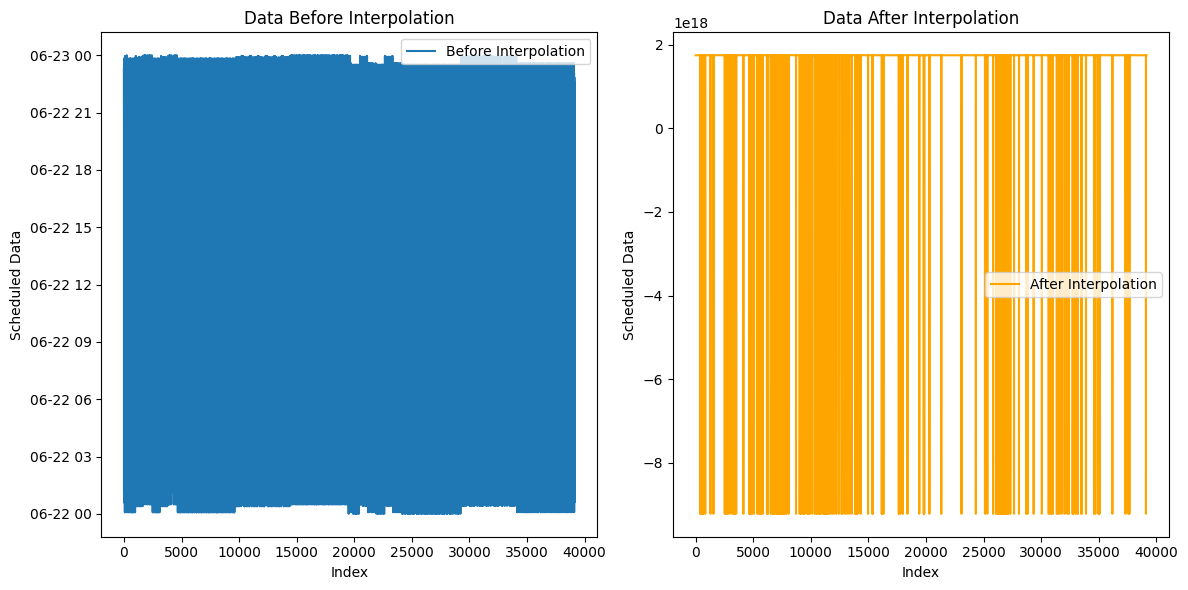

In [27]:
from scipy.interpolate import interp1d

# Загружаем данные из CSV-файла
df_test = pd.read_csv('/Users/dmitry/ВАД/ДЗшки/ДЗ 3 /bus_table.csv')

# Создаем полиномиальный интерполятор
df_test['scheduled'] = pd.to_datetime(df_test['scheduled'])  # Преобразуем столбец в datetime, если это необходимо
interpolator = interp1d(df_test.index, df_test['scheduled'], kind='quadratic')

# Вычисляем новые значения для интерполяции
x_new = np.linspace(df_test.index.min(), df_test.index.max(), num=len(df_test.index))
y_new = interpolator(x_new)

# Добавляем новые интерполированные значения в DataFrame
df_test['scheduled_interpolated'] = y_new

# Создаем figure с двумя подграфиками
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Рисуем данные до интерполяции
axs[0].plot(df_test.index, df_test['scheduled'], label='Before Interpolation')
axs[0].set_title('Data Before Interpolation')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Scheduled Data')
axs[0].legend()

# Рисуем данные после интерполяции
axs[1].plot(x_new, df_test['scheduled_interpolated'], label='After Interpolation', color='orange')
axs[1].set_title('Data After Interpolation')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Scheduled Data')
axs[1].legend()

# Приводим график к плотному виду
plt.tight_layout()
plt.show()

In [28]:
display(df_test)
df_test.info()
df_test.describe()

,data,route,direction,scheduled,actual,scheduled_interpolated
0,2016-03-26,A,south,2025-06-22 01:11:57,01:13:19,1.750555e+18
1,2016-03-26,A,south,2025-06-22 23:19:57,23:16:13,1.750634e+18
2,2016-03-26,A,south,2025-06-22 21:19:57,21:18:46,1.750627e+18
3,2016-03-26,A,south,2025-06-22 19:04:57,19:01:49,1.750619e+18
4,2016-03-26,A,south,2025-06-22 16:42:57,16:42:39,1.750611e+18
...,...,...,...,...,...,...
39152,2016-05-27,B,north,2025-06-22 10:50:25,10:49:50,1.750589e+18
39153,2016-05-27,B,north,2025-06-22 13:02:27,13:07:10,1.750597e+18
39154,2016-05-27,B,north,2025-06-22 15:14:29,15:15:55,1.750605e+18
39155,2016-05-27,B,north,2025-06-22 17:26:29,17:25:40,1.750613e+18


<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data                    39157 non-null  object        
 1   route                   39157 non-null  object        
 2   direction               39157 non-null  object        
 3   scheduled               38917 non-null  datetime64[ns]
 4   actual                  39157 non-null  object        
 5   scheduled_interpolated  39157 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.1+ MB


,scheduled,scheduled_interpolated
count,38917,3.915700e+04
mean,2025-06-22 13:41:35.925045504,1.683338e+18
min,2025-06-22 00:00:25,-9.223372e+18
25%,2025-06-22 09:06:59,1.750583e+18
50%,2025-06-22 14:03:28,1.750601e+18
75%,2025-06-22 17:58:56,1.750615e+18
max,2025-06-22 23:59:58,1.750637e+18
std,NaN,8.565156e+17


### Способ 4: Заполнение пропусков максимально похожими значениями из столбца scheduled максимально близкими к actual

In [29]:
# Пояснительная бригада: если в ячейке "scheduled" нет данных, 
# код должен искать наиболее подходящее значение из уникального списка значений в столбце "scheduled"
# те самое близкое и реалистиченое время к "actual"
d_f = pd.read_csv('/Users/dmitry/ВАД/ДЗшки/ДЗ 3 /bus_table.csv')

# Преобразование столбцов в формат datetime, если они не являются таковыми
d_f['scheduled'] = pd.to_datetime(d_f['scheduled'])
d_f['actual'] = pd.to_datetime(d_f['actual'])

# Создание уникального списка значений в столбце "actual"
unique_actual_values = d_f['actual'].unique()

# Заполнение пропущенных значений в столбце "scheduled" наиболее подходящими значениями из "actual"
for index, row in d_f.iterrows():
    if pd.isnull(row['scheduled']):
        closest_value = min(unique_actual_values, key=lambda x: abs((x - row['actual']).total_seconds()))
        d_f.at[index, 'scheduled'] = closest_value

# Вывод обновленного DataFrame
display(d_f)

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/2134364949.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d_f['scheduled'] = pd.to_datetime(d_f['scheduled'])
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_33767/2134364949.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d_f['actual'] = pd.to_datetime(d_f['actual'])


,data,route,direction,scheduled,actual
0,2016-03-26,A,south,2025-06-22 01:11:57,2025-06-22 01:13:19
1,2016-03-26,A,south,2025-06-22 23:19:57,2025-06-22 23:16:13
2,2016-03-26,A,south,2025-06-22 21:19:57,2025-06-22 21:18:46
3,2016-03-26,A,south,2025-06-22 19:04:57,2025-06-22 19:01:49
4,2016-03-26,A,south,2025-06-22 16:42:57,2025-06-22 16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,2025-06-22 10:50:25,2025-06-22 10:49:50
39153,2016-05-27,B,north,2025-06-22 13:02:27,2025-06-22 13:07:10
39154,2016-05-27,B,north,2025-06-22 15:14:29,2025-06-22 15:15:55
39155,2016-05-27,B,north,2025-06-22 17:26:29,2025-06-22 17:25:40


In [30]:
d_f.info()
d_f.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       39157 non-null  object        
 1   route      39157 non-null  object        
 2   direction  39157 non-null  object        
 3   scheduled  39157 non-null  datetime64[ns]
 4   actual     39157 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 2.8+ MB


,scheduled,actual
count,39157,39157
mean,2025-06-22 13:42:14.053323776,2025-06-22 13:42:25.134382080
min,2025-06-22 00:00:25,2025-06-22 00:00:13
25%,2025-06-22 09:06:59,2025-06-22 09:08:29
50%,2025-06-22 14:04:56,2025-06-22 14:04:27
75%,2025-06-22 17:58:54,2025-06-22 18:00:01
max,2025-06-22 23:59:58,2025-06-22 23:59:57
